# **A Comprehensive Guide to LLMs’ Inference and Serving**

https://www.e2enetworks.com/blog/a-comprehensive-guide-to-llms-inference-and-serving-2

# vLLM: Easy, Fast, and Cheap LLM Serving with PagedAttention:

https://blog.vllm.ai/2023/06/20/vllm.html

https://www.youtube.com/watch?v=G7rXlZR68SQ

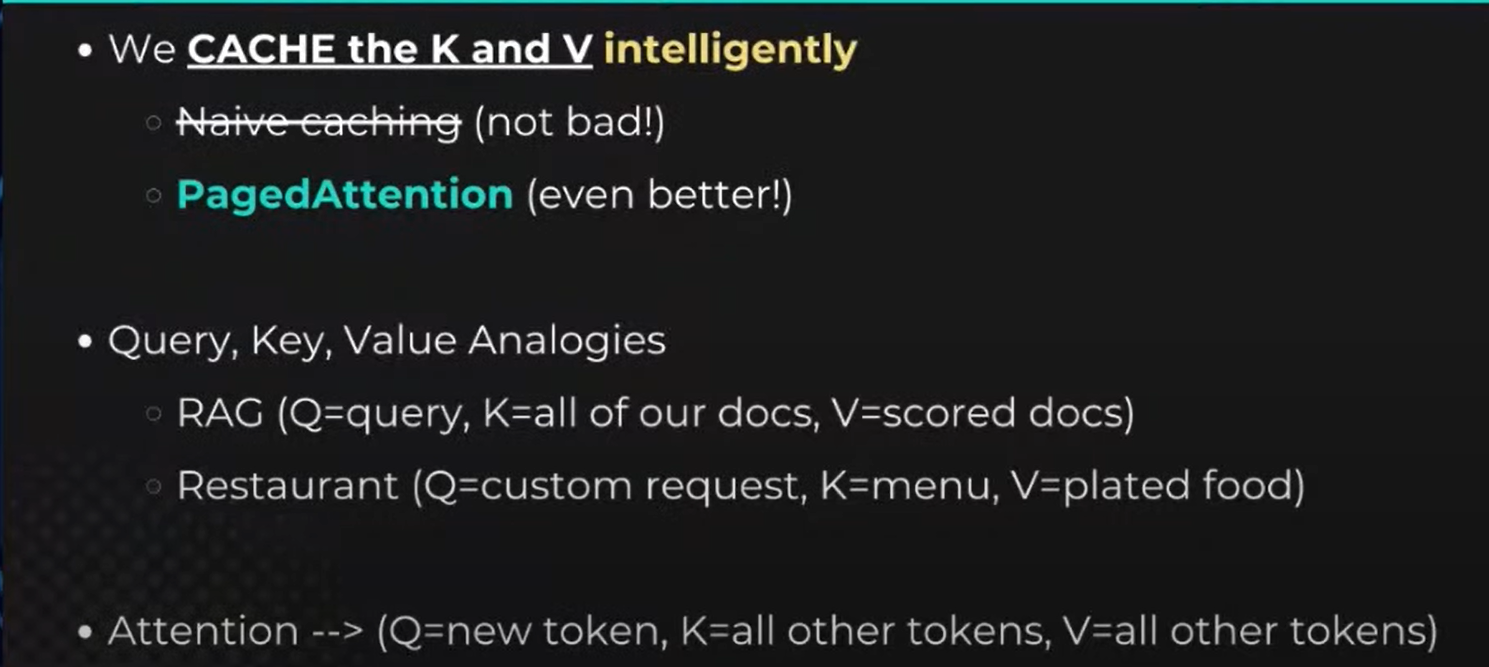

Paging in operating System - same algorithm used in vllm to optimise the LLM inference

Reference videos -

https://www.youtube.com/watch?v=pJ6qrCB8pDw

https://www.youtube.com/watch?v=j0IqYWyBAKE

## Documentation

https://docs.vllm.ai/en/latest/

Decoding vLLM: Strategies for Supercharging Your Language Model Inferences: Article on Vllm

https://www.analyticsvidhya.com/blog/2023/12/decoding-vllm-strategies-for-supercharging-your-language-model-inferences/

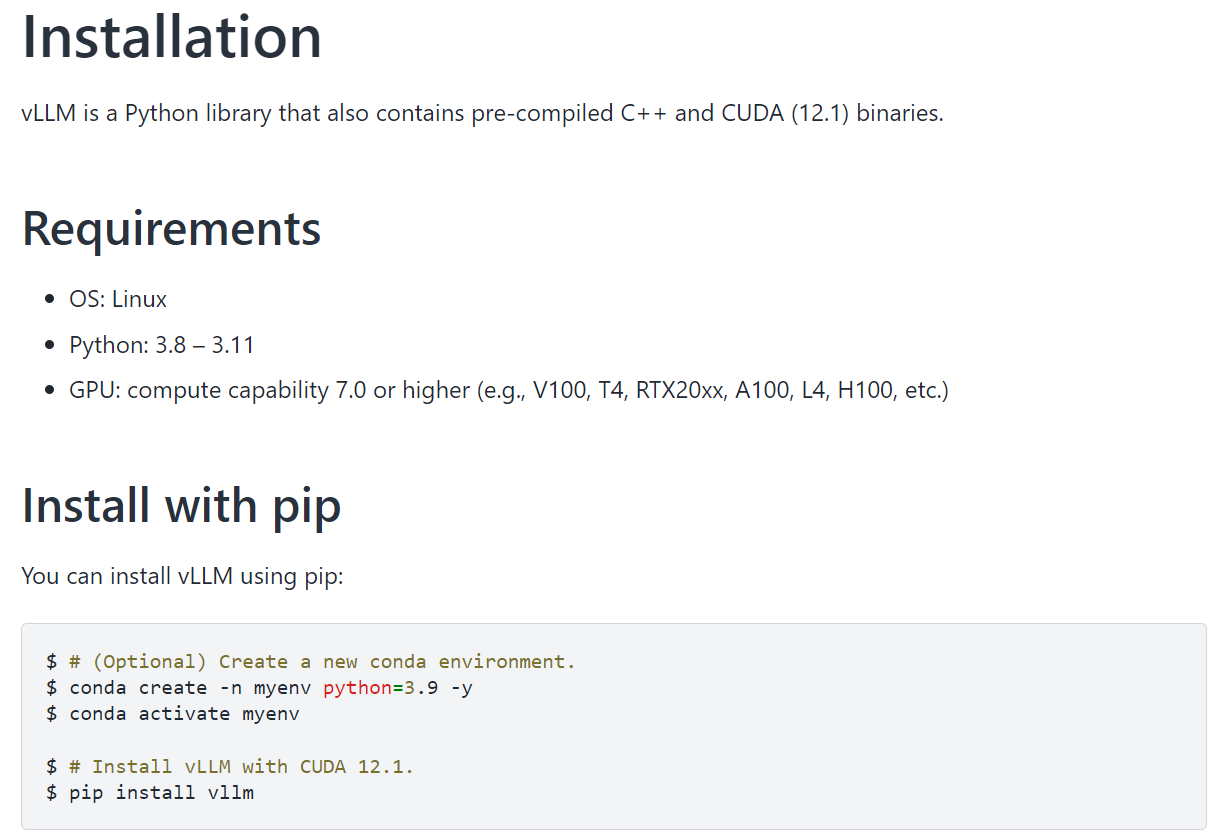

# Quickstart
This guide shows how to use vLLM to:

1. run offline batched inference on a dataset;

2. build an API server for a large language model;

3. start an OpenAI-compatible API server.

Be sure to complete the installation instructions before continuing with this guide.

# Offline Batched Inference

We first show an example of using vLLM for offline batched inference on a dataset. In other words, we use vLLM to generate texts for a list of input prompts.

Import LLM and SamplingParams from vLLM. The LLM class is the main class for running offline inference with vLLM engine. The SamplingParams class specifies the parameters for the sampling process.

In [1]:
from vllm import LLM, SamplingParams

Define the list of input prompts and the sampling parameters for generation. The sampling temperature is set to 0.8 and the nucleus sampling probability is set to 0.95. For more information about the sampling parameters, refer to the class definition.
https://github.com/vllm-project/vllm/blob/main/vllm/sampling_params.py

In [7]:
prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

Initialize vLLM’s engine for offline inference with the LLM class and the gemma-7b-it model.

In [8]:
llm = LLM("google/gemma-7b-it")

INFO 03-02 17:44:05 llm_engine.py:87] Initializing an LLM engine with config: model='google/gemma-7b-it', tokenizer='google/gemma-7b-it', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=8192, download_dir=None, load_format=auto, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, seed=0)


RuntimeError: NVML_SUCCESS == DriverAPI::get()->nvmlInit_v2_() INTERNAL ASSERT FAILED at "../c10/cuda/CUDACachingAllocator.cpp":1123, please report a bug to PyTorch. 

Call llm.generate to generate the outputs. 

It adds the input prompts to vLLM engine’s waiting queue and executes the vLLM engine to generate the outputs with high throughput. 

The outputs are returned as a list of RequestOutput objects, which include all the output tokens.

In [4]:
outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

Processed prompts: 100%|██████████| 4/4 [00:00<00:00,  8.20it/s]

Prompt: 'Hello, my name is', Generated text: ' [name] and I am writing to you regarding the issue of [issue].'
Prompt: 'The president of the United States is', Generated text: ' the head of the federal government, but he or she does not have the power'
Prompt: 'The capital of France is', Generated text: ' what?\n\nThe answer is Paris.\n\nParis is the capital of France,'
Prompt: 'The future of AI is', Generated text: ' bright. With the constant advancements in technology, AI is poised to revolutionize numerous'


In [3]:
new_prompts = [
    "Could you please write a Streamlit program to integrate with the vllm server api "
]
sampling_params = SamplingParams(temperature=0.6, top_p=0.95, max_tokens=2500)

In [4]:
outputs = llm.generate(new_prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

NameError: name 'llm' is not defined

In [17]:
generated_text

'\n\n```python\nimport streamlit as st\nimport vllm_api\n\n# Define the VLLM server URL\nurl = "localhost:8080"\n\n# Create a VLLM API object\napi = vllm_api.VLLMAPI(url)\n\n# Get the list of VLLM devices\ndevices = api.get_devices()\n\n# Display the list of devices\nst.write("VLLM Devices:")\nst.write(devices)\n```\n\n**Additional Notes:**\n\n* The `vllm_api` library is a Python library that simplifies interaction with the VLLM server API.\n* The `url` variable should be replaced with the actual URL of your VLLM server.\n* The `devices` variable will contain a list of all VLLM devices available on the server.\n* You can display the list of devices using the `st.write()` function.\n\n**Example Usage:**\n\nTo use this program, simply run the following command:\n\n```\nstreamlit run vllm_integration.py\n```\n\nThe program will open a Streamlit app that displays a list of VLLM devices.\n\n**Output:**\n\n```\nVLLM Devices:\n[\n    {\'name\': \'VLLM-1\', \'ip_address\': \'192.168.1.1\', \'s

'\n\n```python\nimport streamlit as st\nimport vllm_api\n\n# Define the VLLM server URL\nurl = "localhost:8080"\n\n# Create a VLLM API object\napi = vllm_api.VLLMAPI(url)\n\n# Get the list of VLLM devices\ndevices = api.get_devices()\n\n# Display the list of devices\nst.write("VLLM Devices:")\nst.write(devices)\n```\n\n**Additional Notes:**\n\n* The `vllm_api` library is a Python library that simplifies interaction with the VLLM server API.\n* The `url` variable should be replaced with the actual URL of your VLLM server.\n* The `devices` variable will contain a list of all VLLM devices available on the server.\n* You can display the list of devices using the `st.write()` function.\n\n**Example Usage:**\n\nTo use this program, simply run the following command:\n\n```\nstreamlit run vllm_integration.py\n```\n\nThe program will open a Streamlit app that displays a list of VLLM devices.\n\n**Output:**\n\n```\nVLLM Devices:\n[\n    {\'name\': \'VLLM-1\', \'ip_address\': \'192.168.1.1\', \'status\': \'Online\'},\n    {\'name\': \'VLLM-2\', \'ip_address\': \'192.168.1.2\', \'status\': \'Offline\'}\n]\n```'

# OpenAI-Compatible Server

vLLM can be deployed as a server that implements the OpenAI API protocol. 

This allows vLLM to be used as a drop-in replacement for applications using OpenAI API. 

By default, it starts the server at http://localhost:8000. You can specify the address with --host and --port arguments. 

The server currently hosts one model at a time (google/gemma-7b-it in the command below) and implements list models, create chat completion, and create completion endpoints. 

python -m vllm.entrypoints.openai.api_server \
    --model google/gemma-7b-it

**Once the vllm api server is initialised with above command**

**We can access locally using ssh command "ssh dlvaayuai@49.205.217.16 -l 8000:localhost:8000" in CMD**

**once ssh is authroized if we enter the below command in CMD we will get the response**

Reference video link 

https://www.youtube.com/watch?v=1TU9ZrZhqw0


```
curl http://localhost:8000/v1/completions \
    -H "Content-Type: application/json" \
    -d '{
        "model": "google/gemma-7b-it",
        "prompt": "San Francisco is a",
        "max_tokens": 100,
        "temperature": 0
    }'

```    

In [4]:
import torch
import gc
from vllm.model_executor.parallel_utils.parallel_state import destroy_model_parallel

# To clear the Model memory from GPU use below code snippet

In [5]:
destroy_model_parallel()

gc.collect()
torch.cuda.empty_cache()
torch.distributed.destroy_process_group()
Print("Sucessfully delete the llm Pipeline and free the GPU memory!")


AssertionError: 